In [1]:
import pandas as pd

# Feature names
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]

#Loading the dataset

data = pd.read_csv('data/adult.data', sep="\s*,", names=names)
print (data.head())

C:\Users\Sayak\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

# Data Exploration

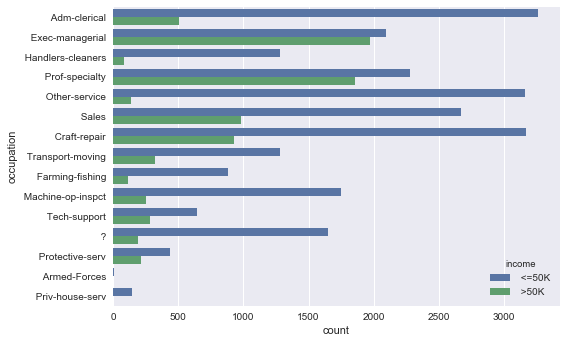

In [2]:
#Inome counts by occupation

import seaborn as sns 
import matplotlib as plt

sns.countplot(y='occupation', hue='income', data=data,)
sns.plt.show()

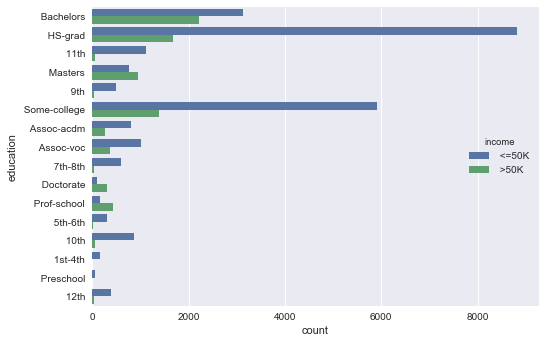

In [4]:
#Income counts by education

sns.countplot(y='education', hue='income', data=data,)
sns.plt.show()

In [3]:
# Transforming the categorical variables to numeric variables in order to make the computation more readable
# for the classifier

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [18]:
# Handling the missing values with Mean Imputation 

# Columns having missing values 'workclass 1', 'native-country 13', 'occupation 6'

from sklearn.preprocessing import Imputer
import numpy as np

data[['workclass','occupation','native-country']] = data[['workclass','occupation','native-country']].replace('?', np.NaN)


values = data.values
imputer = Imputer()
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())

0


In [16]:
data[['workclass','occupation','native-country']]

,workclass,occupation,native-country
0,7,1,39
1,6,4,39
2,4,6,39
3,4,6,39
4,4,10,5
5,4,4,39
6,4,8,23
7,6,4,39
8,4,10,39
9,4,4,39


In [20]:
data.to_csv('Curated_Data.csv')

In [34]:
# Normalizing the dataset within the range of (0,1)

from sklearn.preprocessing import MinMaxScaler

#Seperating the input and output components

X = values[:,0:14]
Y = values[:,14]

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

/home/sayak/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


# Ensemble-based Classifier

In [35]:
# Bagged Decision Trees for Classification

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time
# Setting the random seed value so that the randomness of the model can be controlled
seed = 7

#Preparing the folds for Cross-Validation (Validation of the model)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
start = time()
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_scaled, Y, cv=kfold)

print(results.mean())
print "Bagged Decision Trees took %.2f seconds" % (time() - start)

0.853751803901
Bagged Decision Trees took 165.21 seconds


In [36]:
# AdaBoost based Boosting Approach

from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
start = time()
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_scaled, Y, cv=kfold)
print(results.mean())
print "AdaBoost based Ensemble took %.2f seconds" % (time() - start)

0.856577168133
AdaBoost based Ensemble took 9.55 seconds


In [37]:
# Voting based approach

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

# Create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

start = time()
# Create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_scaled, Y, cv=kfold)
print(results.mean())
print "Voting based Ensemble took %.2f seconds" % (time() - start)

0.835355431771
Voting based Ensemble took 352.70 seconds
